<a href="https://colab.research.google.com/github/aylinyilmz/DSA-210-PROJECT/blob/main/data_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CODES AND VISUALIZATIONS

Saving screen time and sleep data combined.xlsx to screen time and sleep data combined (3).xlsx
Pearson: -0.113 (p=0.537) | Spearman: -0.095 (p=0.605)


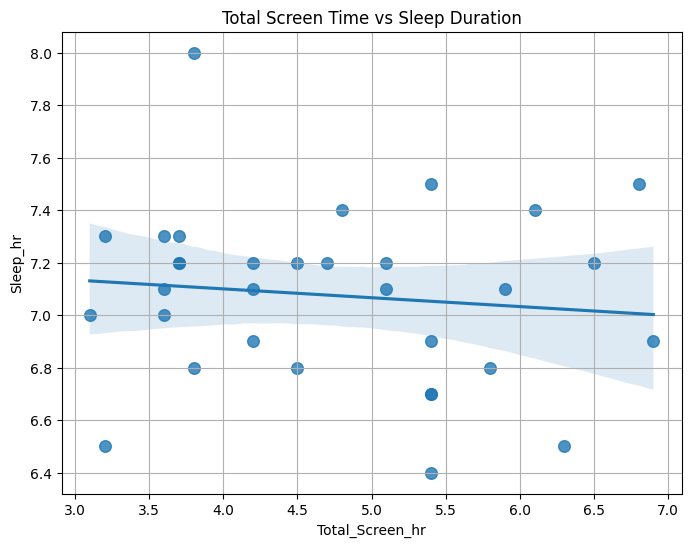

In [5]:
import pandas as pd

# Upload your Excel file using the upload button
from google.colab import files
uploaded = files.upload()

# Replace the file name if it's different
df = pd.read_excel("screen time and sleep data combined.xlsx")

# Rename for simplicity
df = df.rename(columns={
    "Total Duration of Screen (hours)": "Total_Screen_hr",
    "Total Duration of Screen Before Bed (minutes)": "Before_Bed_min",
    "Total Duration of Sleep (in hours)": "Sleep_hr"
})

# Convert Before_Bed to hours
df["Before_Bed_hr"] = df["Before_Bed_min"] / 60
df = df.dropna(subset=["Total_Screen_hr", "Before_Bed_hr", "Sleep_hr", "Night Waking Frequency"])


import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Correlation
pearson_corr, p_pearson = pearsonr(df["Total_Screen_hr"], df["Sleep_hr"])
spearman_corr, p_spearman = spearmanr(df["Total_Screen_hr"], df["Sleep_hr"])
print(f"Pearson: {pearson_corr:.3f} (p={p_pearson:.3f}) | Spearman: {spearman_corr:.3f} (p={p_spearman:.3f})")

# Visualization
plt.figure(figsize=(8,6))
sns.regplot(x="Total_Screen_hr", y="Sleep_hr", data=df, scatter_kws={'s':70})
plt.title("Total Screen Time vs Sleep Duration")
plt.grid(True)
plt.show()


Pearson: 0.159 (p=0.385) | Spearman: 0.121 (p=0.508)


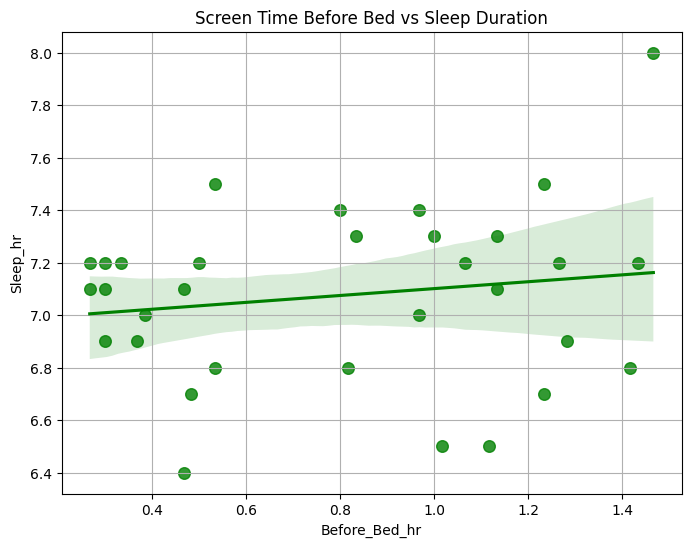

In [6]:
# Correlation
pearson_corr_bb, p_pearson_bb = pearsonr(df["Before_Bed_hr"], df["Sleep_hr"])
spearman_corr_bb, p_spearman_bb = spearmanr(df["Before_Bed_hr"], df["Sleep_hr"])
print(f"Pearson: {pearson_corr_bb:.3f} (p={p_pearson_bb:.3f}) | Spearman: {spearman_corr_bb:.3f} (p={p_spearman_bb:.3f})")

# Visualization
plt.figure(figsize=(8,6))
sns.regplot(x="Before_Bed_hr", y="Sleep_hr", data=df, scatter_kws={'s':70}, color='green')
plt.title("Screen Time Before Bed vs Sleep Duration")
plt.grid(True)
plt.show()


Total Screen vs Wake: Pearson=0.005, Spearman=0.037


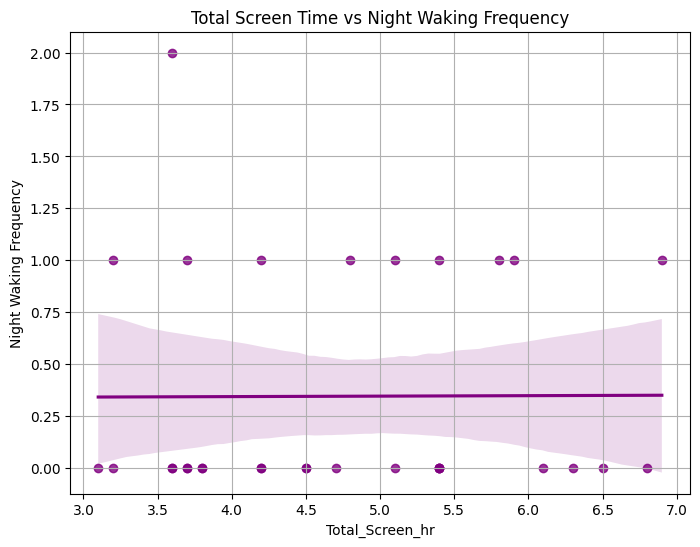

Before Bed vs Wake: Pearson=0.045, Spearman=-0.021


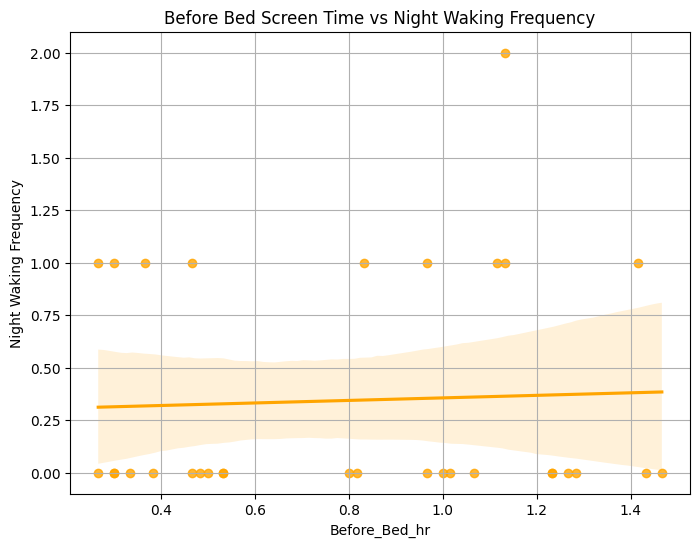

In [7]:
# Total Screen Time vs Night Waking Frequency
pearson_scr_nw, _ = pearsonr(df["Total_Screen_hr"], df["Night Waking Frequency"])
spearman_scr_nw, _ = spearmanr(df["Total_Screen_hr"], df["Night Waking Frequency"])
print(f"Total Screen vs Wake: Pearson={pearson_scr_nw:.3f}, Spearman={spearman_scr_nw:.3f}")

plt.figure(figsize=(8,6))
sns.regplot(x="Total_Screen_hr", y="Night Waking Frequency", data=df, color='purple')
plt.title("Total Screen Time vs Night Waking Frequency")
plt.grid(True)
plt.show()

# Before Bed vs Night Waking Frequency
pearson_bb_nw, _ = pearsonr(df["Before_Bed_hr"], df["Night Waking Frequency"])
spearman_bb_nw, _ = spearmanr(df["Before_Bed_hr"], df["Night Waking Frequency"])
print(f"Before Bed vs Wake: Pearson={pearson_bb_nw:.3f}, Spearman={spearman_bb_nw:.3f}")

plt.figure(figsize=(8,6))
sns.regplot(x="Before_Bed_hr", y="Night Waking Frequency", data=df, color='orange')
plt.title("Before Bed Screen Time vs Night Waking Frequency")
plt.grid(True)
plt.show()


COMPARISION ON WEEKDAY AND WEEKEND

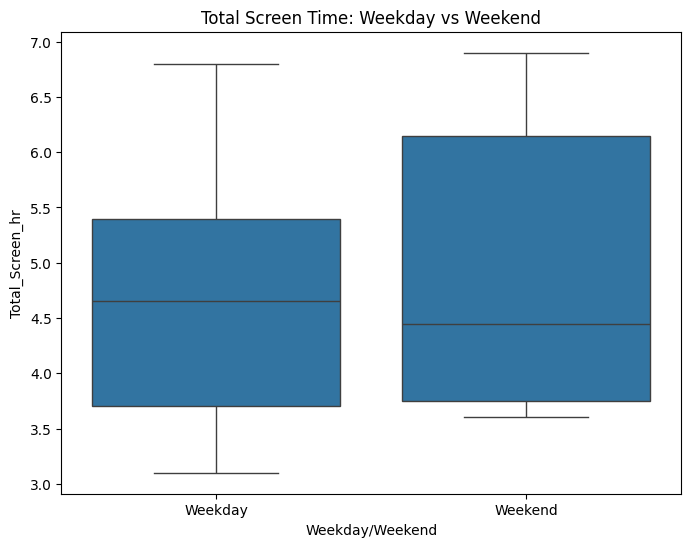

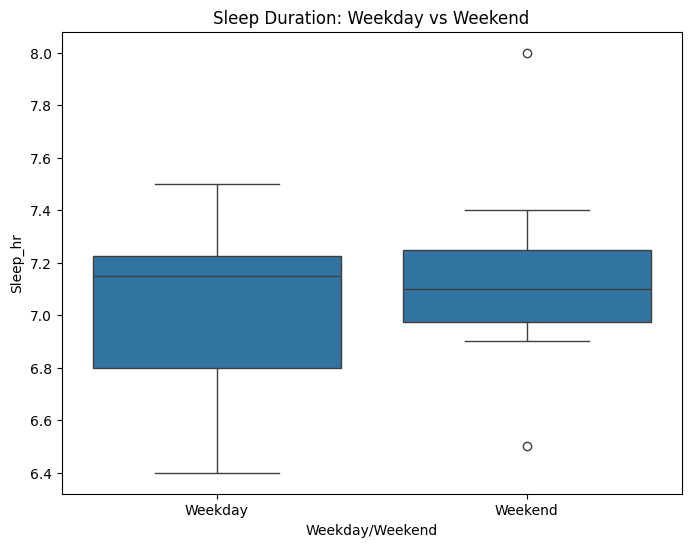

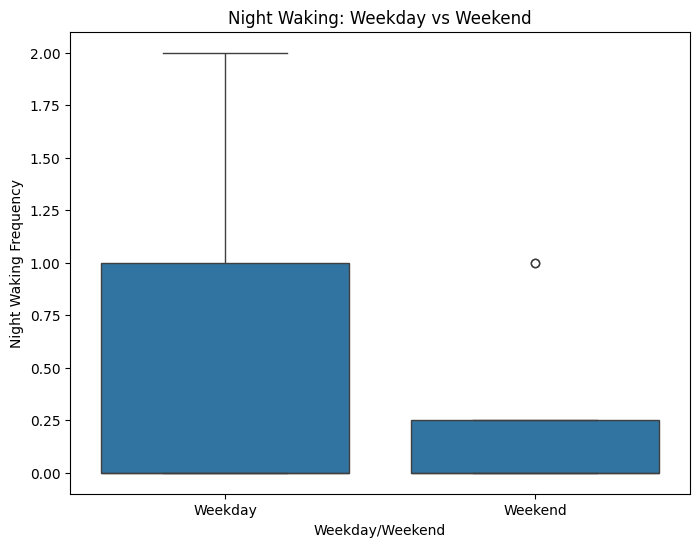

In [8]:

df["Weekday/Weekend"] = df["Weekday/Weekend"].astype(str)

plt.figure(figsize=(8,6))
sns.boxplot(x="Weekday/Weekend", y="Total_Screen_hr", data=df)
plt.title("Total Screen Time: Weekday vs Weekend")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x="Weekday/Weekend", y="Sleep_hr", data=df)
plt.title("Sleep Duration: Weekday vs Weekend")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x="Weekday/Weekend", y="Night Waking Frequency", data=df)
plt.title("Night Waking: Weekday vs Weekend")
plt.show()


SLEEP DURATION VS SCREEN TIME

<ipython-input-9-8cb72d4709cd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Screen_Group", y="Sleep_hr", data=group_means, palette="Blues_d")


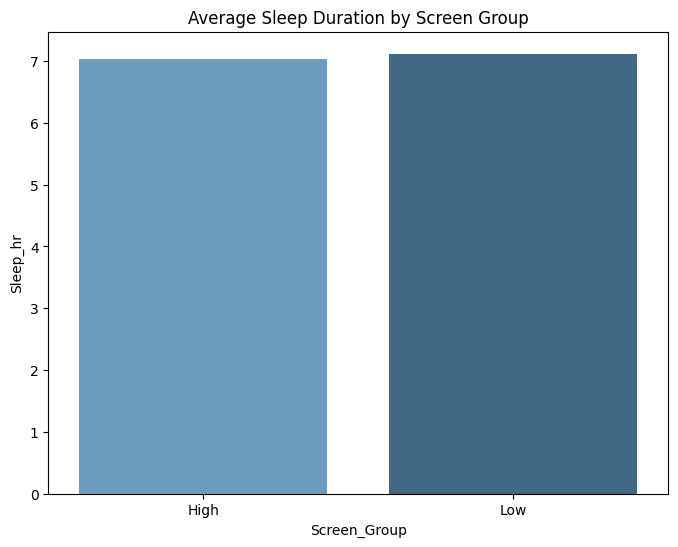

<ipython-input-9-8cb72d4709cd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Screen_Group", y="Night Waking Frequency", data=group_means, palette="Greens_d")


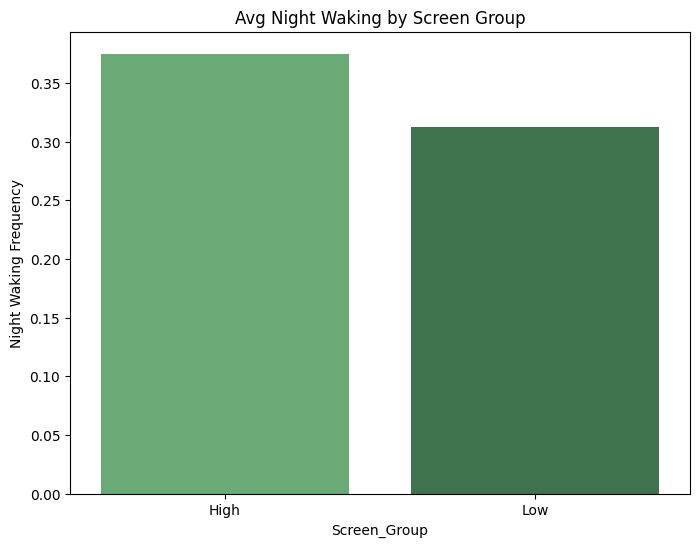

In [9]:
# Define groups based on median
median = df["Total_Screen_hr"].median()
df["Screen_Group"] = df["Total_Screen_hr"].apply(lambda x: "High" if x > median else "Low")

# Grouped means
group_means = df.groupby("Screen_Group")[["Sleep_hr", "Night Waking Frequency"]].mean().reset_index()

# Bar Chart: Sleep
plt.figure(figsize=(8,6))
sns.barplot(x="Screen_Group", y="Sleep_hr", data=group_means, palette="Blues_d")
plt.title("Average Sleep Duration by Screen Group")
plt.show()

# Bar Chart: Night Waking
plt.figure(figsize=(8,6))
sns.barplot(x="Screen_Group", y="Night Waking Frequency", data=group_means, palette="Greens_d")
plt.title("Avg Night Waking by Screen Group")
plt.show()


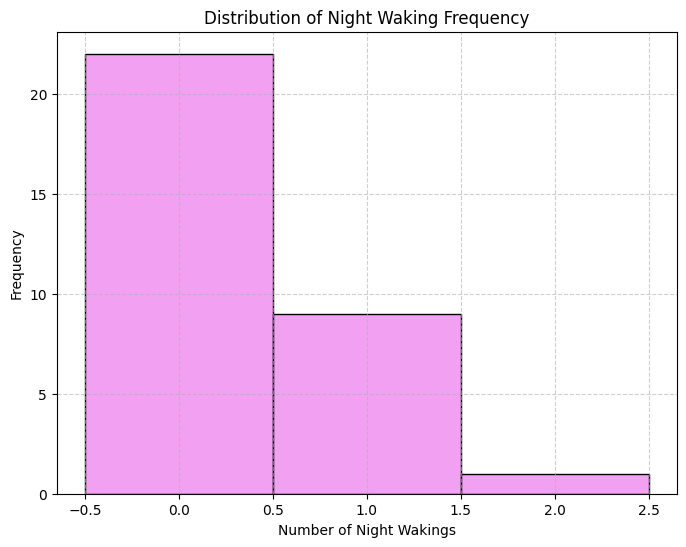

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(df["Night Waking Frequency"], bins=range(int(df["Night Waking Frequency"].max()) + 2),
             discrete=True, color='violet')
plt.title("Distribution of Night Waking Frequency")
plt.xlabel("Number of Night Wakings")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


STATISTICAL VALUES WITH VISUALS


 Statistics for Total_Screen_hr:
Mean: 4.74
Median: 4.60
Standard Deviation: 1.11
Min: 3.10
Max: 6.90

 Statistics for Before_Bed_hr:
Mean: 0.80
Median: 0.82
Standard Deviation: 0.40
Min: 0.27
Max: 1.47

 Statistics for Sleep_hr:
Mean: 7.07
Median: 7.10
Standard Deviation: 0.33
Min: 6.40
Max: 8.00

 Statistics for Night Waking Frequency:
Mean: 0.34
Median: 0.00
Standard Deviation: 0.55
Min: 0.00
Max: 2.00


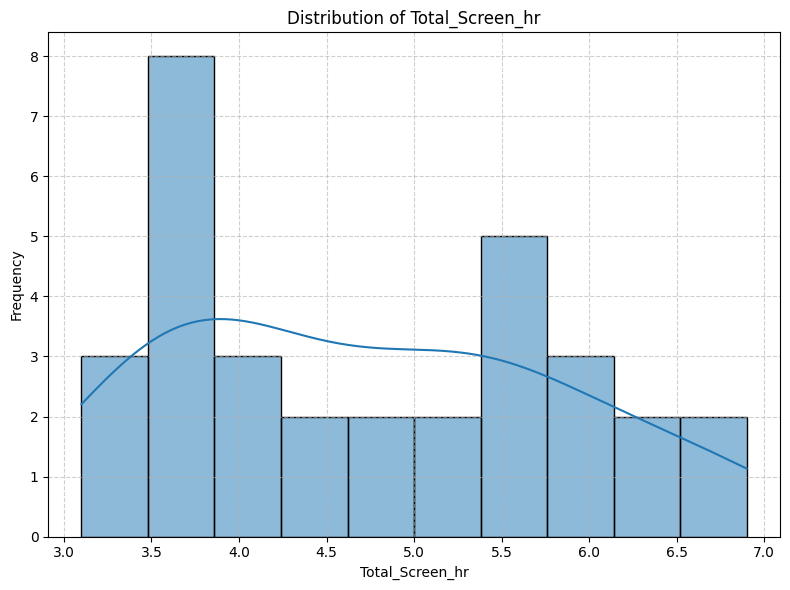

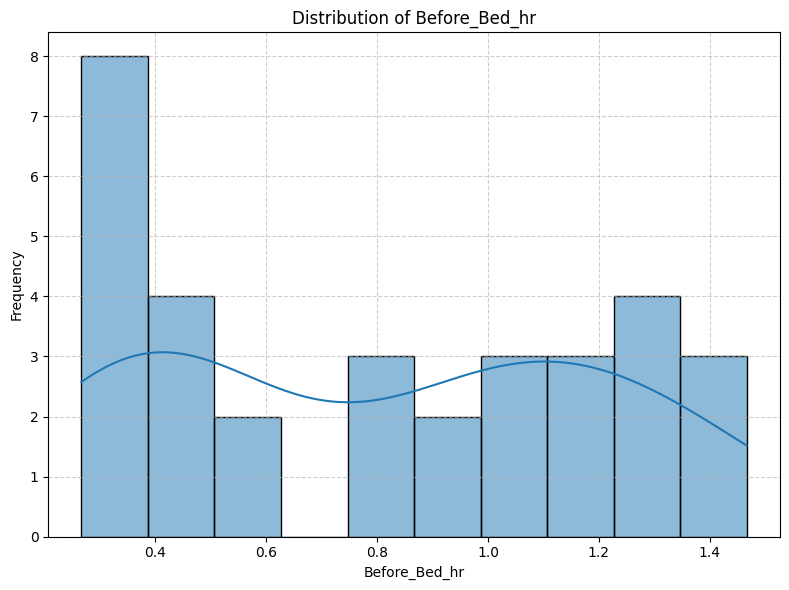

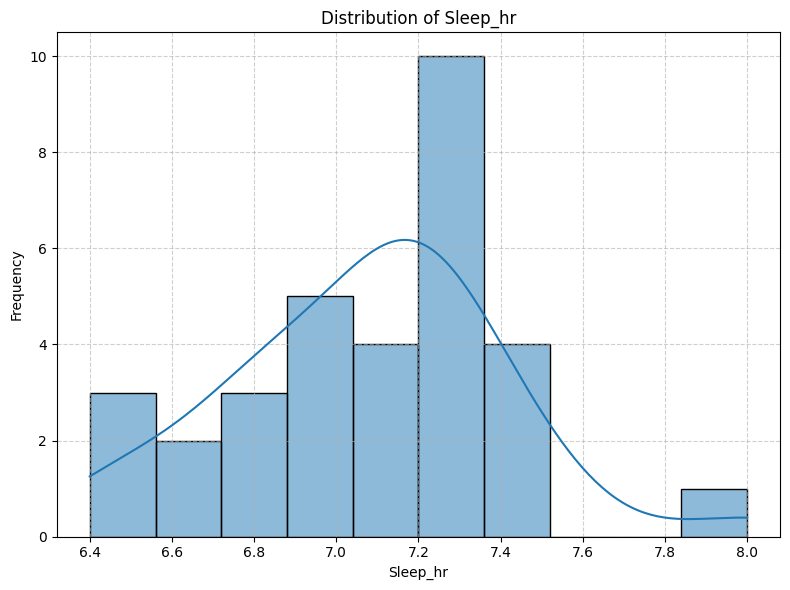

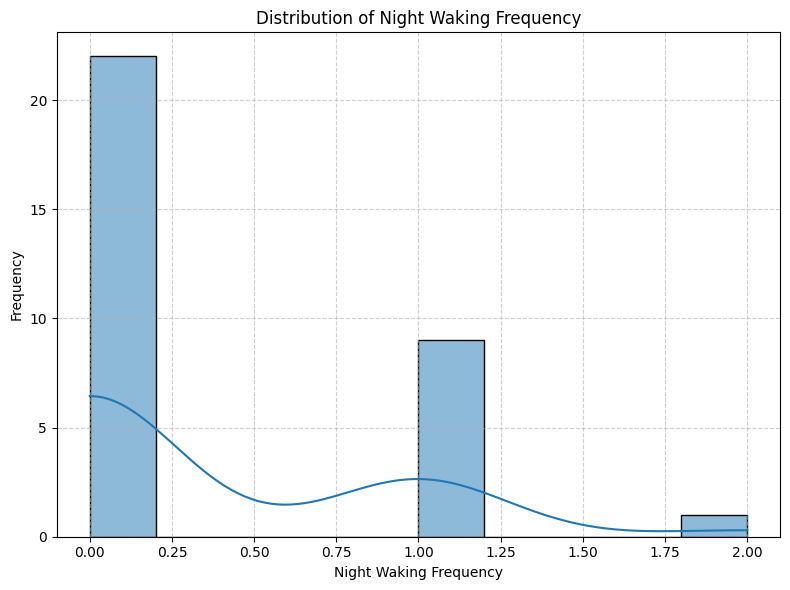

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel("screen time and sleep data combined.xlsx")
df = df.rename(columns={
    "Total Duration of Screen (hours)": "Total_Screen_hr",
    "Total Duration of Screen Before Bed (minutes)": "Before_Bed_min",
    "Total Duration of Sleep (in hours)": "Sleep_hr"
})
df["Before_Bed_hr"] = df["Before_Bed_min"] / 60

# Drop rows with missing values
df = df.dropna(subset=["Total_Screen_hr", "Before_Bed_hr", "Sleep_hr", "Night Waking Frequency"])

# Print descriptive statistics
variables = ["Total_Screen_hr", "Before_Bed_hr", "Sleep_hr", "Night Waking Frequency"]
for var in variables:
    print(f"\n Statistics for {var}:")
    print(f"Mean: {df[var].mean():.2f}")
    print(f"Median: {df[var].median():.2f}")
    print(f"Standard Deviation: {df[var].std():.2f}")
    print(f"Min: {df[var].min():.2f}")
    print(f"Max: {df[var].max():.2f}")

# Plot histograms
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], bins=10, kde=True)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.savefig(f"{var}_hist.png")
